In [3]:
import os

# Create and set a custom temp directory for pip
os.environ['TMPDIR'] = '/home/fenrir/tmp'  # Or any path you control
os.makedirs(os.environ['TMPDIR'], exist_ok=True)

# Then install pymdp
!pip install pymdp


  Using cached pymdp-0.0.1-py3-none-any.whl.metadata (552 bytes)
  Using cached torch-2.6.0-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached nose-1.3.7-py3-none-any.whl.metadata (1.7 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvi

In [31]:
import numpy as np
from pymdp.agent import Agent
from pymdp import utils

# Likelihood matrix A: [obs, hidden_state]
A_matrix = np.array([
    [0.9, 0.2],
    [0.1, 0.8]
])
A_matrix /= A_matrix.sum(axis=0, keepdims=True)
A = np.array([A_matrix], dtype=object)  # ✅ Correct object array
A = utils.to_obj_array(A)

# Transition matrix B: [state, state, action]
B_matrix = np.array([
    [[1.0, 0.0],  # action 0
     [0.0, 1.0]]  # action 1
])
B = np.array([B_matrix], dtype=object)
B = utils.to_obj_array(B)

# Preferences over observations (C): [obs]
C_vector = np.array([1.0, 0.0])  # prefer observation 0
C = np.array([C_vector], dtype=object)
C = utils.to_obj_array(C)

# Initial state beliefs (D): [state]
D_vector = np.array([0.5, 0.5])
D = np.array([D_vector], dtype=object)
D = utils.to_obj_array(D)


agent = Agent(A=A, B=B, C=C, D=D, policy_len=1)



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [39]:
import numpy as np
from pymdp.agent import Agent

# --- A: likelihood mapping (obs x state)
A_matrix = np.array([
    [0.9, 0.2],
    [0.1, 0.8]
])
A_matrix /= A_matrix.sum(axis=0, keepdims=True)
A = np.array([A_matrix], dtype=object)

# --- B: transition mapping (state x state x action)
B_matrix = np.zeros((2, 2, 1))
B_matrix[:, :, 0] = np.eye(2)
B = np.array([B_matrix], dtype=object)

# --- C: preferences over observations
C = np.array([np.array([1.0, 0.0])], dtype=object)

# --- D: prior belief over states
D = np.array([np.array([0.5, 0.5])], dtype=object)

# --- Create the agent (no use of utils.to_obj_array)
agent = Agent(A=A, B=B, C=C, D=D, policy_len=1)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

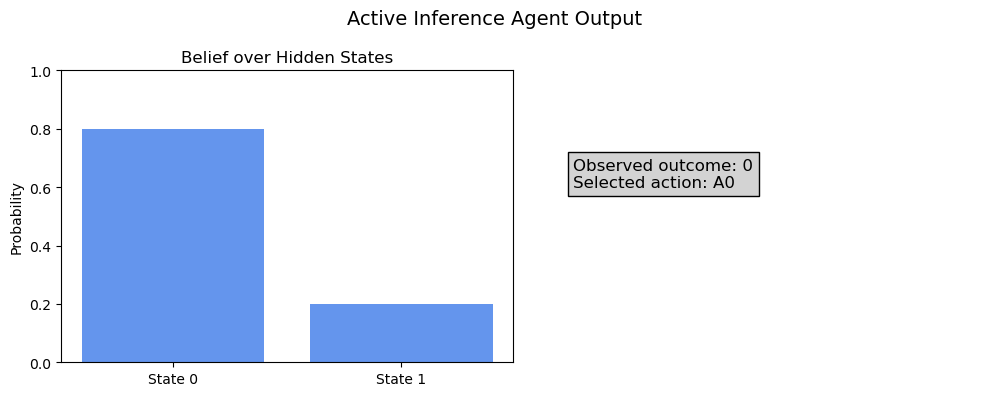

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Example outputs from the agent
qs = np.array([0.8, 0.2])  # belief over hidden states after observation
chosen_action = 0          # selected action by the agent
obs = [0]                  # observed outcome

# Create the plot
plt.figure(figsize=(10, 4))

# Plot 1: Belief over hidden states
plt.subplot(1, 2, 1)
plt.bar(['State 0', 'State 1'], qs, color='cornflowerblue')
plt.title("Belief over Hidden States")
plt.ylabel("Probability")
plt.ylim(0, 1)

# Plot 2: Text summary of the observation and action
plt.subplot(1, 2, 2)
plt.axis('off')
text = f"Observed outcome: {obs[0]}\nSelected action: A{chosen_action}"
plt.text(0.1, 0.6, text, fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='black'))

plt.suptitle("Active Inference Agent Output", fontsize=14)
plt.tight_layout()
plt.show()


In [11]:
!pip install git+https://github.com/infer-actively/pymdp.git


  Cloning https://github.com/infer-actively/pymdp.git to ./tmp/pip-req-build-hbm3erm7
  ERROR: Error [Errno 2] No such file or directory: 'git' while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [12]:
!pip install inferactively-pymdp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 10.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 10.1 MB/s eta 0:00:00


In [40]:
import numpy as np
from pymdp.agent import Agent

# --- A: likelihood mapping (obs x state)
A_matrix = np.array([
    [0.9, 0.2],
    [0.1, 0.8]
])
A_matrix /= A_matrix.sum(axis=0, keepdims=True)
A = np.array([A_matrix], dtype=object)

# --- B: transition mapping (state x state x action)
B_matrix = np.zeros((2, 2, 1))
B_matrix[:, :, 0] = np.eye(2)
B = np.array([B_matrix], dtype=object)

# --- C: preferences over observations
C = np.array([np.array([1.0, 0.0])], dtype=object)

# --- D: prior belief over states
D = np.array([np.array([0.5, 0.5])], dtype=object)

# --- Create the agent (no use of utils.to_obj_array)
agent = Agent(A=A, B=B, C=C, D=D, policy_len=1)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [41]:
import numpy as np
from pymdp.agent import Agent

# A: Likelihood matrix [obs x state]
A_matrix = np.array([
    [0.9, 0.2],
    [0.1, 0.8]
])
A_matrix /= A_matrix.sum(axis=0, keepdims=True)
A = [A_matrix]  # ✅ plain list of arrays

# B: Transition matrix [state x state x action]
B_matrix = np.zeros((2, 2, 1))
B_matrix[:, :, 0] = np.eye(2)
B = [B_matrix]  # ✅ plain list of arrays

# C: Preferences over observations
C = [np.array([1.0, 0.0])]  # ✅ plain list of arrays

# D: Prior belief over hidden states
D = [np.array([0.5, 0.5])]  # ✅ plain list of arrays

# Create agent (this time it'll work 💪)
agent = Agent(A=A, B=B, C=C, D=D, policy_len=1)


TypeError: A matrix must be a numpy array

In [44]:
import pymdp
from pymdp import utils
from pymdp.agent import Agent
num_obs = [3, 5] # observation modality dimensions
num_states = [3, 2, 2] # hidden state factor dimensions
num_controls = [3, 1, 1] # control state factor dimensions
A_matrix = utils.random_A_matrix(num_obs, num_states) # create sensory likelihood (A matrix)
B_matrix = utils.random_B_matrix(num_states, num_controls) # create transition likelihood (B matrix)
C_vector = utils.obj_array_uniform(num_obs) # uniform preferences
# instantiate a quick agent using your A, B and C arrays
my_agent = Agent( A = A_matrix, B = B_matrix, C = C_vector)
# give the agent a random observation and get the optimized posterior beliefs
observation = [1, 4] # a list specifying the indices of the observation, for each observation modality
qs = my_agent.infer_states(observation) # get posterior over hidden states (a multi-factor belief)
# Do active inference q_pi, neg_efe = my_agent.infer_policies() # return the policy posterior and 
#return (negative) expected free action = my_agent.sample_action() # sample an action
# ... and so on ...
for t in range(10):
    obs = [np.random.choice(o) for o in num_obs]
    qs = my_agent.infer_states(obs)
    q_pi, _ = my_agent.infer_policies()
    action = my_agent.sample_action()
    print(f"Timestep {t}, Obs: {obs}, Action: {action}")


Timestep 0, Obs: [2, 3], Action: [1. 0. 0.]
Timestep 1, Obs: [2, 0], Action: [0. 0. 0.]
Timestep 2, Obs: [0, 2], Action: [1. 0. 0.]
Timestep 3, Obs: [0, 3], Action: [0. 0. 0.]
Timestep 4, Obs: [1, 2], Action: [0. 0. 0.]
Timestep 5, Obs: [2, 0], Action: [1. 0. 0.]
Timestep 6, Obs: [1, 0], Action: [0. 0. 0.]
Timestep 7, Obs: [0, 3], Action: [2. 0. 0.]
Timestep 8, Obs: [1, 1], Action: [0. 0. 0.]
Timestep 9, Obs: [2, 3], Action: [0. 0. 0.]


NameError: name 'qs_history' is not defined

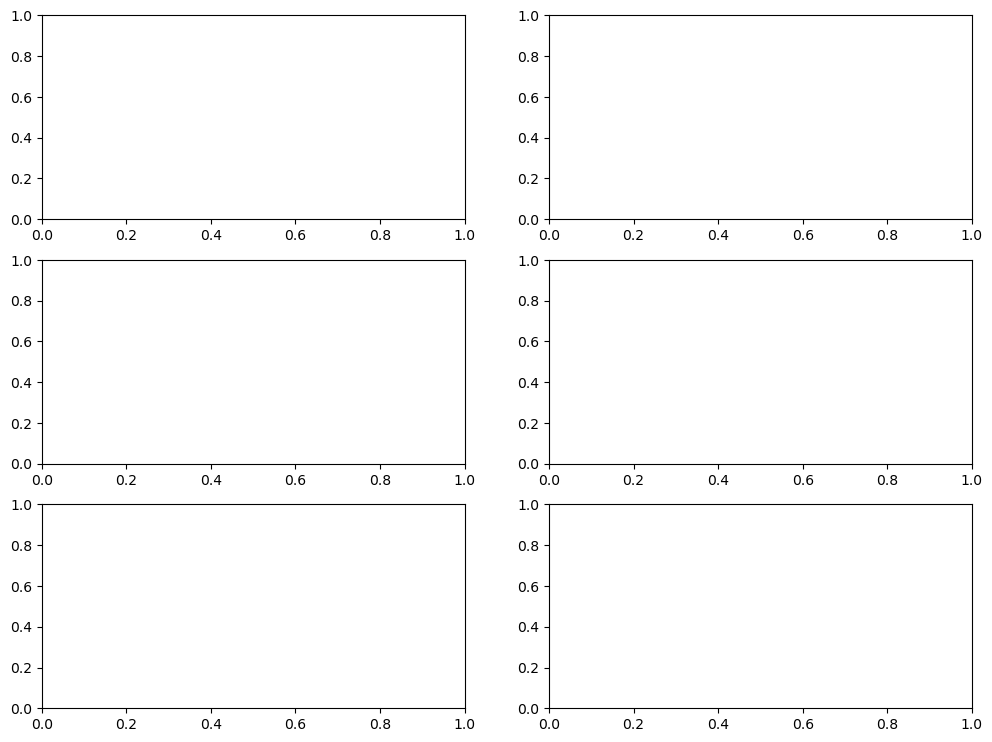

In [45]:
# Plotting
fig, axs = plt.subplots(len(num_states), 2, figsize=(12, 3 * len(num_states)))

for f in range(len(num_states)):
    qs_array = np.array(qs_history[f])
    for s in range(num_states[f]):
        axs[f, 0].plot(qs_array[:, s], label=f"State {s}")
    axs[f, 0].set_title(f"Belief over Hidden State Factor {f}")
    axs[f, 0].set_xlabel("Timestep")
    axs[f, 0].set_ylabel("Belief")
    axs[f, 0].legend()

    axs[f, 1].plot(entropy_history[f], color="orange")
    axs[f, 1].set_title(f"Entropy of Beliefs (Factor {f})")
    axs[f, 1].set_xlabel("Timestep")
    axs[f, 1].set_ylabel("Entropy")

plt.tight_layout()
plt.show()

# Plot Expected Free Energy per Policy
plt.figure(figsize=(8, 4))
efe_array = np.array(efe_history)
for i in range(efe_array.shape[1]):
    plt.plot(efe_array[:, i], label=f"Policy {i}")
plt.title("Expected Free Energy per Policy Over Time")
plt.xlabel("Timestep")
plt.ylabel("Negative EFE")
plt.legend()
plt.tight_layout()
plt.show()

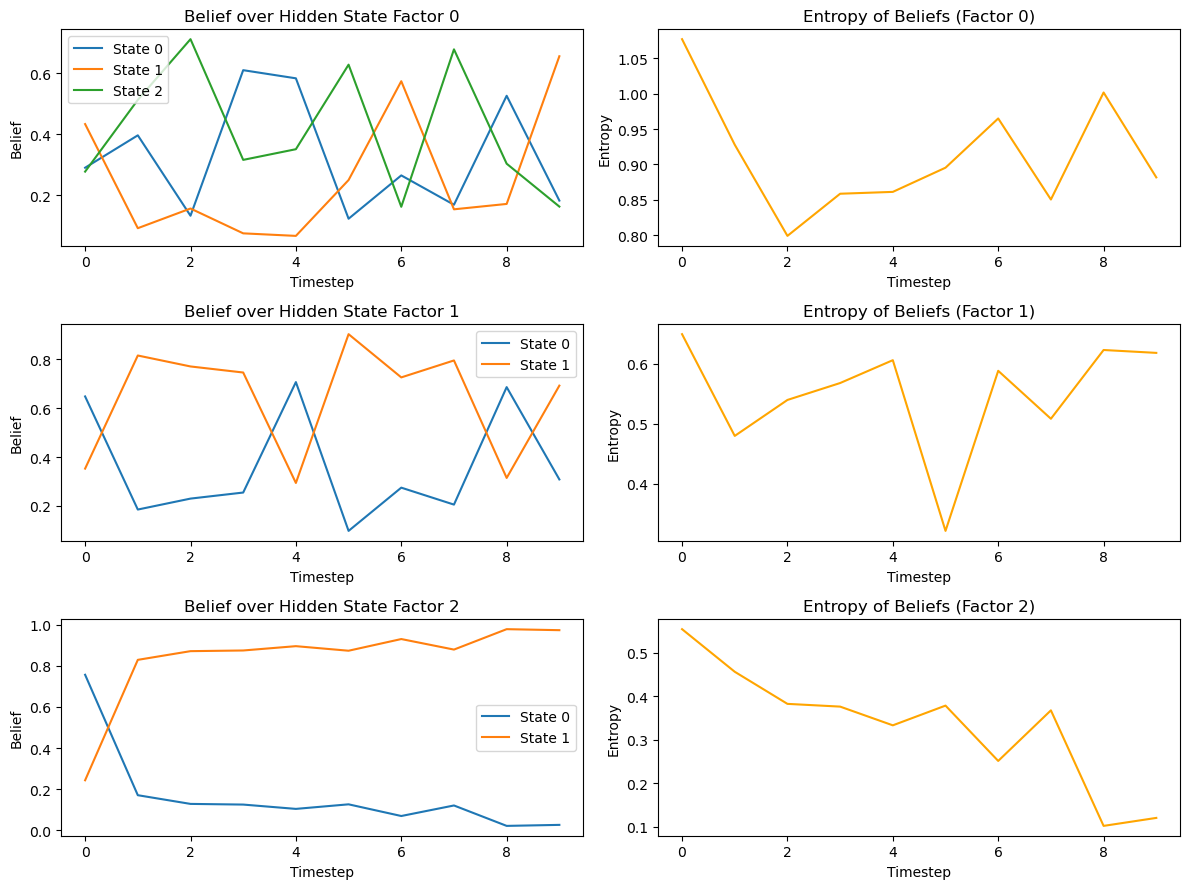

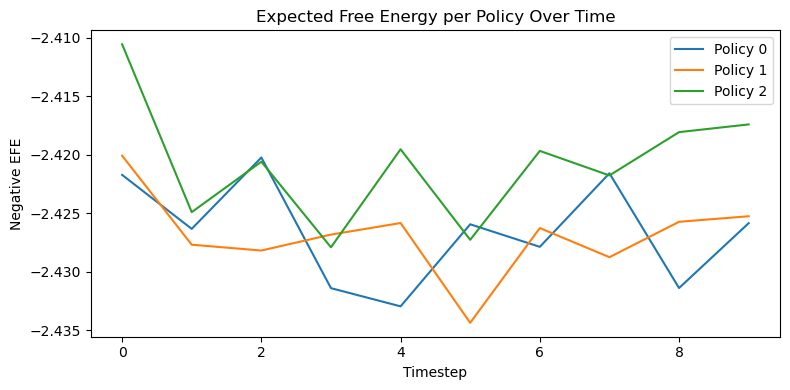

In [3]:
# === IMPORTS ===
import numpy as np
import matplotlib.pyplot as plt
from pymdp.agent import Agent
from pymdp import utils

# === MODEL DEFINITION ===

# Define the shape of the environment:
# 2 observation modalities: one with 3 possible outcomes, the other with 5
num_obs = [3, 5]

# 3 hidden state factors (dimensions = 3, 2, and 2)
num_states = [3, 2, 2]

# Agent can only control the first hidden state factor (3 options); the rest are passive
num_controls = [3, 1, 1]

# Randomly generate an A matrix (likelihood): how observations depend on hidden states
A = utils.random_A_matrix(num_obs, num_states)

# Randomly generate B matrix (transition model): how hidden states evolve over time
B = utils.random_B_matrix(num_states, num_controls)

# Set a uniform preference over observations — the agent doesn't initially "prefer" anything
C = utils.obj_array_uniform(num_obs)

# Instantiate the agent
agent = Agent(A=A, B=B, C=C)

# === SIMULATION SETUP ===

T = 10  # number of timesteps = number of agent-environment interactions

# Logs for tracking everything that happens
obs_history = []              # what the agent saw
action_history = []           # what action it took
qs_history = [[] for _ in num_states]  # belief over hidden states at each timestep
entropy_history = [[] for _ in num_states]  # how uncertain the agent was at each step
efe_history = []              # expected free energy of each policy at each timestep

# === SIMULATION LOOP ===

for t in range(T):
    # Simulate an observation: randomly pick one observation from each modality
    obs = [np.random.choice(o) for o in num_obs]

    # Agent performs perceptual inference: "What hidden state caused these observations?"
    qs = agent.infer_states(obs)

    # Agent plans ahead: "What actions would minimize expected surprise?"
    q_pi, neg_efe = agent.infer_policies()

    # Agent commits to action: picks an action from the lowest EFE policy
    action = agent.sample_action()

    # Log data
    obs_history.append(obs)
    action_history.append(action)
    efe_history.append(neg_efe.copy())

    # For each hidden state factor...
    for f in range(len(num_states)):
        qs_history[f].append(qs[f])  # log belief distribution
        # compute entropy: how uncertain is the agent's belief?
        entropy = -np.sum(qs[f] * np.log(qs[f] + 1e-16))
        entropy_history[f].append(entropy)

# === PLOTTING BELIEFS AND ENTROPY ===

fig, axs = plt.subplots(len(num_states), 2, figsize=(12, 3 * len(num_states)))

for f in range(len(num_states)):
    qs_array = np.array(qs_history[f])  # beliefs over time

    # Left plot: belief distribution over states
    for s in range(num_states[f]):
        axs[f, 0].plot(qs_array[:, s], label=f"State {s}")
    axs[f, 0].set_title(f"Belief over Hidden State Factor {f}")
    axs[f, 0].set_xlabel("Timestep")
    axs[f, 0].set_ylabel("Belief")
    axs[f, 0].legend()

    # Right plot: entropy (uncertainty) over time
    axs[f, 1].plot(entropy_history[f], color="orange")
    axs[f, 1].set_title(f"Entropy of Beliefs (Factor {f})")
    axs[f, 1].set_xlabel("Timestep")
    axs[f, 1].set_ylabel("Entropy")

plt.tight_layout()
plt.show()

# === PLOTTING EFE (Expected Free Energy) ===

plt.figure(figsize=(8, 4))
efe_array = np.array(efe_history)
for i in range(efe_array.shape[1]):
    plt.plot(efe_array[:, i], label=f"Policy {i}")
plt.title("Expected Free Energy per Policy Over Time")
plt.xlabel("Timestep")
plt.ylabel("Negative EFE")
plt.legend()
plt.tight_layout()
plt.show()


# === TIME-STEP ===
## timestep = one fulltime cycle by the agent
###Receives an observation from the environment (e.g., [1, 4])
###Infers hidden states (belief update via agent.infer_states(obs))
###Evaluates potential policies (via expected free energy)
###Chooses an action (agent.sample_action())
###(Optionally) the environment changes due to that action

# ==== CONCLUSIONS
#Belief dynamics: how the agent’s confidence in each hidden state evolves
#Uncertainty monitoring: how sure it is over time (entropy)
#Policy comparison: how favorable each policy looked at each timestep